In [ ]:
!unzip "/content/drive/MyDrive/TumorSegmentasyon/data.zip" -d "/content/"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/data/train/labels/Papiloma_T1C+_7.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_70.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_71.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_73.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_74.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_76.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_77.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_79.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_8.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_80.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_81.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_82.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_83.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_85.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_86.txt  
  inflatin

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import Precision, Recall
from keras.applications.vgg16 import VGG16

In [ ]:
train_images = []
train_masks = []
train_masks_temp = []
val_images = []
val_masks = []
val_masks_temp = []
test_images = []
test_masks = []
test_masks_temp = []

path = "/content/data/train/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    train_images.append(path + fileName)

path = "/content/data/train/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    train_masks_temp.append(path + fileName)

path = "/content/data/val/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    val_images.append(path + fileName)

path = "/content/data/val/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    val_masks_temp.append(path + fileName)

path = "/content/data/test/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    test_images.append(path + fileName)

path = "/content/data/test/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    test_masks_temp.append(path + fileName)

In [ ]:
print(len(train_images))
print(len(train_masks))
print(len(train_masks_temp))
print(len(val_images))
print(len(val_masks))
print(len(val_masks_temp))
print(len(test_images))
print(len(test_masks))
print(len(test_masks_temp))

3160
0
3160
405
0
405
391
0
391


In [ ]:
for imagePath in train_images:
    for maskPath in train_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            train_masks.append(maskPath)
            break

for imagePath in val_images:
    for maskPath in val_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            val_masks.append(maskPath)
            break

for imagePath in test_images:
    for maskPath in test_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            test_masks.append(maskPath)
            break

In [ ]:
print(len(train_images))
print(len(train_masks))
print(len(train_masks_temp))
print(len(val_images))
print(len(val_masks))
print(len(val_masks_temp))
print(len(test_images))
print(len(test_masks))
print(len(test_masks_temp))

3160
3160
3160
405
405
405
391
391
391


In [ ]:
print(train_images[0], train_masks[0])
print(val_images[0], val_masks[0])
print(test_images[0], test_masks[0])

/content/data/train/images/Meningioma_T2_163.jpg /content/data/train/masks/Meningioma_T2_163_mask.jpg
/content/data/val/images/Germinoma_T1C+_18.jpeg /content/data/val/masks/Germinoma_T1C+_18_mask.jpg
/content/data/test/images/Astrocitoma_T2_71.jpeg /content/data/test/masks/Astrocitoma_T2_71_mask.jpg


In [ ]:
def get_df(image_paths, mask_paths):
    pd_df = pd.DataFrame({
        'image_paths' : image_paths,
        'mask_paths' : mask_paths
    })
    return pd_df

In [ ]:
train_df = get_df(train_images, train_masks)
val_df = get_df(val_images, val_masks)
test_df = get_df(test_images, test_masks)

In [ ]:
train_df

image_paths  \
0      /content/data/train/images/Meningioma_T2_163.jpg   
1     /content/data/train/images/Meduloblastoma_T1C+...   
2     /content/data/train/images/Tuberculoma_T2_30.jpeg   
3     /content/data/train/images/Neurocitoma_T1C+_14...   
4     /content/data/train/images/Schwannoma_T1C+_188...   
...                                                 ...   
3155      /content/data/train/images/Papiloma_T2_35.jpg   
3156  /content/data/train/images/Oligodendroglioma_T...   
3157   /content/data/train/images/Meningioma_T2_222.jpg   
3158  /content/data/train/images/Meningioma_T1_185.jpeg   
3159   /content/data/train/images/Meningioma_T2_115.jpg   

                                             mask_paths  
0     /content/data/train/masks/Meningioma_T2_163_ma...  
1     /content/data/train/masks/Meduloblastoma_T1C+_...  
2     /content/data/train/masks/Tuberculoma_T2_30_ma...  
3     /content/data/train/masks/Neurocitoma_T1C+_149...  
4     /content/data/train/masks/Schwannoma_T1C+_188_...  
...                                                 ...  
3155  /content/data/train/masks/Papiloma_T2_35_mask.jpg  
3156  /content/data/train/masks/Oligodendroglioma_T1...  
3157  /content/data/train/masks/Meningioma_T2_222_ma...  
3158  /content/data/train/masks/Meningioma_T1_185_ma...  
3159  /content/data/train/masks/Meningioma_T2_115_ma...  

[3160 rows x 2 columns]

In [ ]:
val_df

image_paths  \
0      /content/data/val/images/Germinoma_T1C+_18.jpeg   
1       /content/data/val/images/Schwannoma_T2_51.jpeg   
2        /content/data/val/images/Carcinoma_T1_58.jpeg   
3        /content/data/val/images/Meningioma_T2_91.jpg   
4        /content/data/val/images/Carcinoma_T2_59.jpeg   
..                                                 ...   
400     /content/data/val/images/Papiloma_T1C+_87.jpeg   
401   /content/data/val/images/Meningioma_T1C+_136.jpg   
402  /content/data/val/images/Astrocitoma_T1C+_28.jpeg   
403  /content/data/val/images/Oligodendroglioma_T1C...   
404  /content/data/val/images/Neurocitoma_T1C+_29.jpeg   

                                            mask_paths  
0    /content/data/val/masks/Germinoma_T1C+_18_mask...  
1    /content/data/val/masks/Schwannoma_T2_51_mask.jpg  
2     /content/data/val/masks/Carcinoma_T1_58_mask.jpg  
3    /content/data/val/masks/Meningioma_T2_91_mask.jpg  
4     /content/data/val/masks/Carcinoma_T2_59_mask.jpg  
..                                                 ...  
400  /content/data/val/masks/Papiloma_T1C+_87_mask.jpg  
401  /content/data/val/masks/Meningioma_T1C+_136_ma...  
402  /content/data/val/masks/Astrocitoma_T1C+_28_ma...  
403  /content/data/val/masks/Oligodendroglioma_T1C+...  
404  /content/data/val/masks/Neurocitoma_T1C+_29_ma...  

[405 rows x 2 columns]

In [ ]:
test_df

image_paths  \
0     /content/data/test/images/Astrocitoma_T2_71.jpeg   
1    /content/data/test/images/Meduloblastoma_T1_5....   
2       /content/data/test/images/Germinoma_T1C+_7.jpg   
3     /content/data/test/images/Meningioma_T1_269.jpeg   
4    /content/data/test/images/Meningioma_T1C+_178.jpg   
..                                                 ...   
386     /content/data/test/images/Schwannoma_T2_79.jpg   
387     /content/data/test/images/Papiloma_T1C+_84.jpg   
388  /content/data/test/images/Astrocitoma_T1C+_74.jpg   
389      /content/data/test/images/Germinoma_T2_18.JPG   
390    /content/data/test/images/Schwannoma_T2_33.jpeg   

                                            mask_paths  
0    /content/data/test/masks/Astrocitoma_T2_71_mas...  
1    /content/data/test/masks/Meduloblastoma_T1_5_m...  
2    /content/data/test/masks/Germinoma_T1C+_7_mask...  
3    /content/data/test/masks/Meningioma_T1_269_mas...  
4    /content/data/test/masks/Meningioma_T1C+_178_m...  
..                                                 ...  
386  /content/data/test/masks/Schwannoma_T2_79_mask...  
387  /content/data/test/masks/Papiloma_T1C+_84_mask...  
388  /content/data/test/masks/Astrocitoma_T1C+_74_m...  
389  /content/data/test/masks/Germinoma_T2_18_mask.jpg  
390  /content/data/test/masks/Schwannoma_T2_33_mask...  

[391 rows x 2 columns]

In [ ]:
img_size = (256, 256)
batch_size = 32

In [ ]:
def set_generator(data_frame, batch_size, aug_dict, target_size,
                    image_color_mode="rgb",
                    mask_color_mode="grayscale",
                    image_save_prefix="image",
                    mask_save_prefix="mask",
                    save_to_dir=None,
                    seed=1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "image_paths",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask_paths",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)

    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255.
    mask = mask / 255.
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0

    return (img, mask)

In [ ]:
train_gen = set_generator(train_df, batch_size, dict(), img_size)

val_gen = set_generator(val_df, batch_size, dict(), img_size)

test_gen = set_generator(test_df, batch_size, dict(), img_size)

In [ ]:
def fcn(vgg, classes = 1, fcn8 = False, fcn16 = False):
    pool5 = vgg.get_layer('block5_pool').output
    pool4 = vgg.get_layer('block4_pool').output
    pool3 = vgg.get_layer('block3_pool').output

    conv_6 = Conv2D(1024, (7, 7), activation='relu', padding='same', name="conv_6")(pool5)
    conv_7 = Conv2D(1024, (1, 1), activation='relu', padding='same', name="conv_7")(conv_6)

    conv_8 = Conv2D(classes, (1, 1), activation='relu', padding='same', name="conv_8")(pool4)
    conv_9 = Conv2D(classes, (1, 1), activation='relu', padding='same', name="conv_9")(pool3)

    deconv_7 = Conv2DTranspose(classes, kernel_size=(2,2), strides=(2,2))(conv_7)
    add_1 = Add()([deconv_7, conv_8])
    deconv_8 = Conv2DTranspose(classes, kernel_size=(2,2), strides=(2,2))(add_1)
    add_2 = Add()([deconv_8, conv_9])
    deconv_9 = Conv2DTranspose(classes, kernel_size=(8,8), strides=(8,8))(add_2)

    if fcn8 :
        output_layer = Activation('sigmoid')(deconv_9)
    elif fcn16 :
        deconv_10 = Conv2DTranspose(classes, kernel_size=(16,16), strides=(16,16))(add_1)
        output_layer = Activation('sigmoid')(deconv_10)
    else :
        deconv_11 = Conv2DTranspose(classes, kernel_size=(32,32), strides=(32,32))(conv_7)
        output_layer = Activation('sigmoid')(deconv_11)

    model = Model(inputs=vgg.input, outputs=output_layer)
    return model

In [ ]:
def dice_coef(y_true, y_pred, smooth=100):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2.0 * intersection + smooth) / (union + smooth)

def iou_coef(y_true, y_pred, smooth=100):
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou

def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy()
    return dice_coef_loss(y_true, y_pred) + bce(y_true, y_pred)

In [ ]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
model = fcn(vgg)

model.compile(optimizer=Adamax(learning_rate=0.001), loss=bce_dice_loss, metrics=['accuracy', Precision(), Recall(), dice_coef, iou_coef])

model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
file_path = "Clean-FCN32-VGG16-Adamax-32-bce-dice.h5"
save_path = "/content/" + file_path
drive_path = "/content/drive/MyDrive/TumorSegmentasyon/" + file_path

In [ ]:
checkpoint = ModelCheckpoint(save_path,
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='min',
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=3,
                              mode='min',
                              min_lr=0.0001,
                              verbose= 1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           mode='min',
                           restore_best_weights=True,
                           verbose=1)

history = model.fit(train_gen,
                    epochs= 100,
                    callbacks=[early_stop, checkpoint, reduce_lr],
                    validation_data= val_gen,
                    steps_per_epoch=len(train_df) / batch_size,
                    validation_steps=len(val_df) / batch_size)

Found 3160 validated image filenames.
Found 3160 validated image filenames.
Epoch 1/100
99/98 [==============================] - ETA: 0s - loss: 0.9902 - accuracy: 0.9614 - precision: 0.1635 - recall: 0.1126 - dice_coef: 0.1515 - iou_coef: 0.0840Found 405 validated image filenames.
Found 405 validated image filenames.

Epoch 1: val_loss improved from inf to 0.85635, saving model to /content/Clean-FCN32-VGG16-Adamax-32-bce-dice.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


98/98 [==============================] - 170s 1s/step - loss: 0.9902 - accuracy: 0.9614 - precision: 0.1635 - recall: 0.1126 - dice_coef: 0.1515 - iou_coef: 0.0840 - val_loss: 0.8564 - val_accuracy: 0.9641 - val_precision: 0.2982 - val_recall: 0.2786 - val_dice_coef: 0.2413 - val_iou_coef: 0.1378 - lr: 0.0010
Epoch 2/100
99/98 [==============================] - ETA: 0s - loss: 0.8370 - accuracy: 0.9599 - precision: 0.2842 - recall: 0.3434 - dice_coef: 0.2750 - iou_coef: 0.1611
Epoch 2: val_loss improved from 0.85635 to 0.77703, saving model to /content/Clean-FCN32-VGG16-Adamax-32-bce-dice.h5
98/98 [==============================] - 66s 666ms/step - loss: 0.8370 - accuracy: 0.9599 - precision: 0.2842 - recall: 0.3434 - dice_coef: 0.2750 - iou_coef: 0.1611 - val_loss: 0.7770 - val_accuracy: 0.9761 - val_precision: 0.5850 - val_recall: 0.2595 - val_dice_coef: 0.3457 - val_iou_coef: 0.2106 - lr: 0.0010
Epoch 3/100
99/98 [==============================] - ETA: 0s - loss: 0.6564 - accuracy: 

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_iou = hist.history['iou_coef']
    tr_dice = hist.history['dice_coef']
    tr_loss = hist.history['loss']

    val_acc = hist.history['val_accuracy']
    val_iou = hist.history['val_iou_coef']
    val_dice = hist.history['val_dice_coef']
    val_loss = hist.history['val_loss']

    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    index_iou = np.argmax(iou_coef)
    iou_highest = val_iou[index_iou]
    index_dice = np.argmax(dice_coef)
    dice_highest = val_dice[index_dice]
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]

    Epochs = [i+1 for i in range(len(tr_acc))]

    acc_label = f'best epoch= {str(index_acc + 1)}'
    iou_label = f'best epoch= {str(index_iou + 1)}'
    dice_label = f'best epoch= {str(index_dice + 1)}'
    loss_label = f'best epoch= {str(index_loss + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 20))
    plt.style.use('fivethirtyeight')

    # Training Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training IoU
    plt.subplot(2, 2, 2)
    plt.plot(Epochs, tr_iou, 'r', label= 'Training IoU')
    plt.plot(Epochs, val_iou, 'g', label= 'Validation IoU')
    plt.scatter(index_iou + 1 , iou_highest, s= 150, c= 'blue', label= iou_label)
    plt.title('Training and Validation IoU Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('IoU')
    plt.legend()

    # Training Dice
    plt.subplot(2, 2, 3)
    plt.plot(Epochs, tr_dice, 'r', label= 'Training Dice')
    plt.plot(Epochs, val_dice, 'g', label= 'Validation Dice')
    plt.scatter(index_dice + 1 , dice_highest, s= 150, c= 'blue', label= dice_label)
    plt.title('Training and Validation Dice Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('Dice')
    plt.legend()

    # Training Loss
    plt.subplot(2, 2, 4)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout
    plt.show()

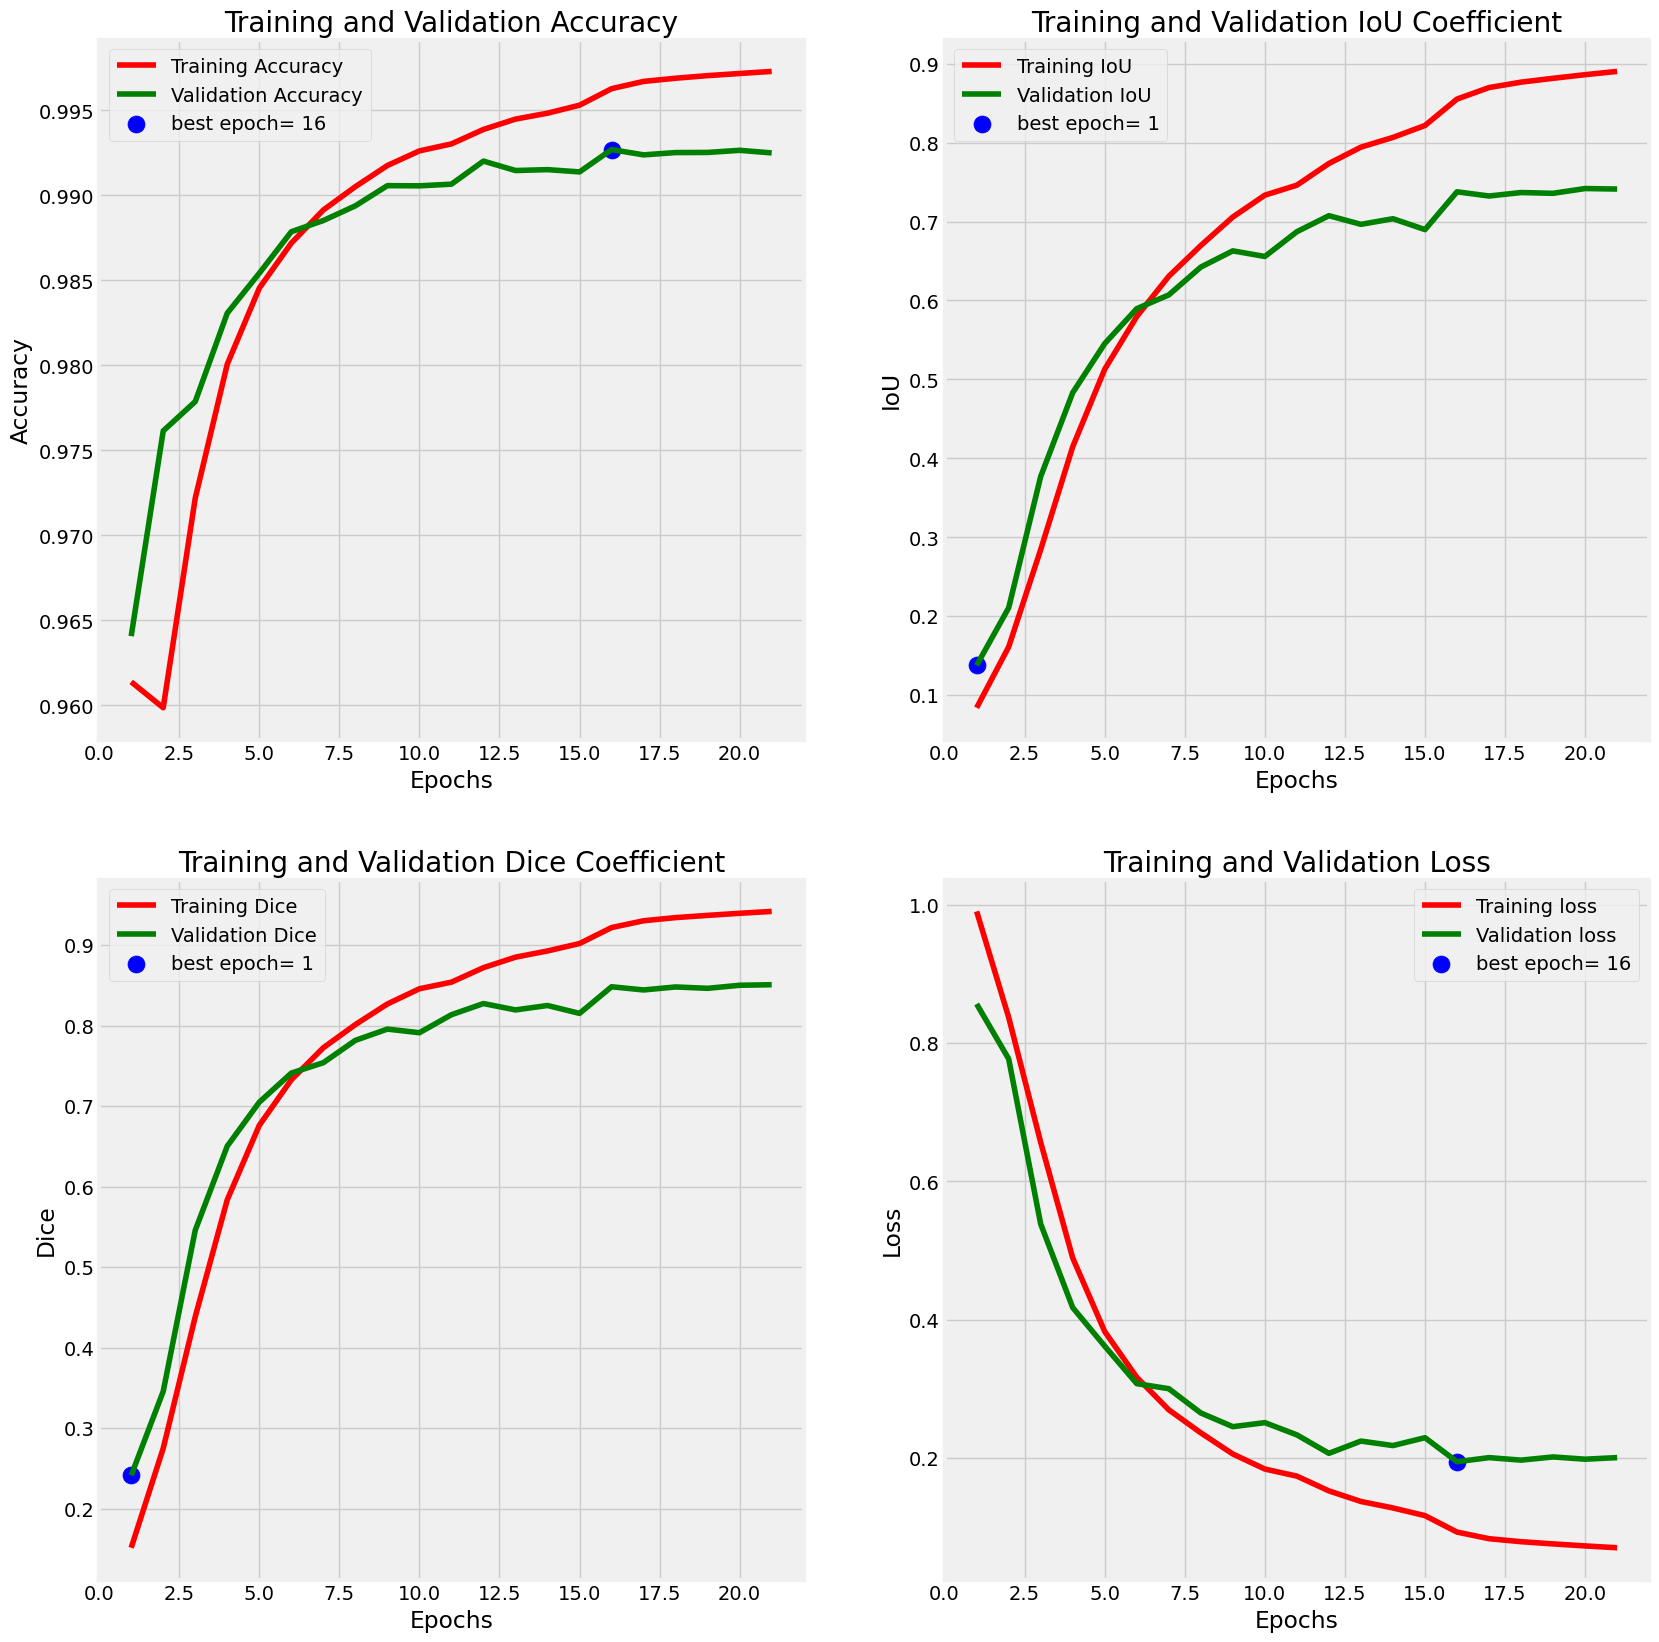

In [ ]:
plot_training(history)

In [ ]:
print(model.metrics_names)

['loss', 'accuracy', 'precision', 'recall', 'dice_coef', 'iou_coef']


In [ ]:
train_score = model.evaluate(train_gen, steps= len(train_df) / batch_size, verbose= 1)
valid_score = model.evaluate(val_gen, steps= len(val_df) / batch_size, verbose= 1)
test_score = model.evaluate(test_gen, steps= len(test_df) / batch_size, verbose= 1)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print("Train Precision: ", train_score[2])
print("Train Recall: ", train_score[3])
print("Train Dice: ", train_score[4])
print("Train IoU: ", train_score[5])
print('-' * 20)

print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print("Valid Precision: ", valid_score[2])
print("Valid Recall: ", valid_score[3])
print("Valid Dice: ", valid_score[4])
print("Valid IoU: ", valid_score[5])
print('-' * 20)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print("Test Precision: ", test_score[2])
print("Test Recall: ", test_score[3])
print("Test Dice: ", test_score[4])
print("Test IoU: ", test_score[5])

12/12 [==============================] - 3s 197ms/step - loss: 0.2056 - accuracy: 0.9920 - precision: 0.8618 - recall: 0.8287 - dice_coef: 0.8403 - iou_coef: 0.7253
Found 391 validated image filenames.
Found 391 validated image filenames.
12/12 [==============================] - 9s 800ms/step - loss: 0.1882 - accuracy: 0.9927 - precision: 0.8820 - recall: 0.8359 - dice_coef: 0.8498 - iou_coef: 0.7401
Train Loss:  0.08361642807722092
Train Accuracy:  0.9966843128204346
Train Precision:  0.9392746090888977
Train Recall:  0.9351814985275269
Train Dice:  0.9298642873764038
Train IoU:  0.8691919445991516
--------------------
Valid Loss:  0.20555654168128967
Valid Accuracy:  0.9920425415039062
Valid Precision:  0.8618256449699402
Valid Recall:  0.8286757469177246
Valid Dice:  0.8403449654579163
Valid IoU:  0.7252547144889832
--------------------
Test Loss:  0.18820415437221527
Test Accuracy:  0.992692232131958
Test Precision:  0.8820443153381348
Test Recall:  0.8358501195907593
Test Dice:  0

Validation Images


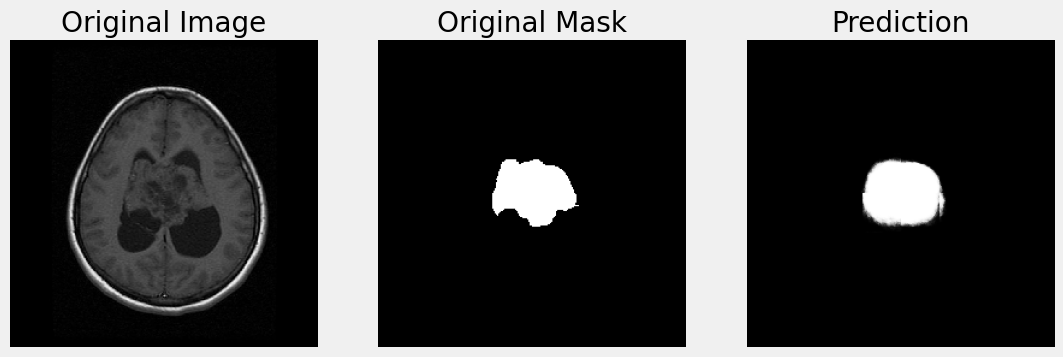

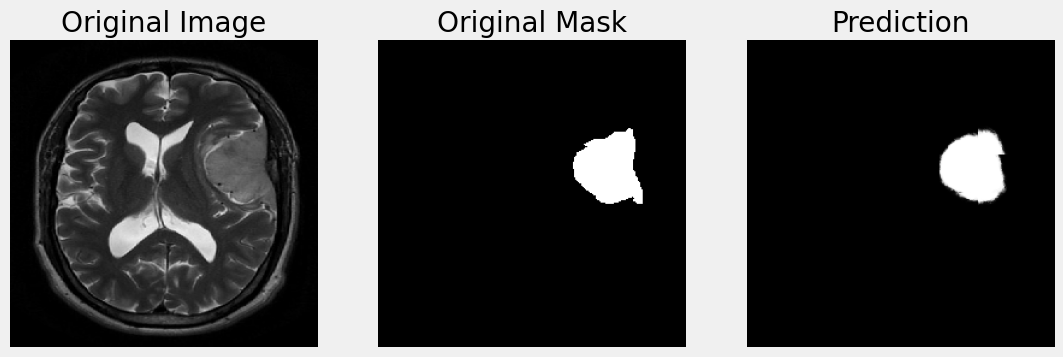

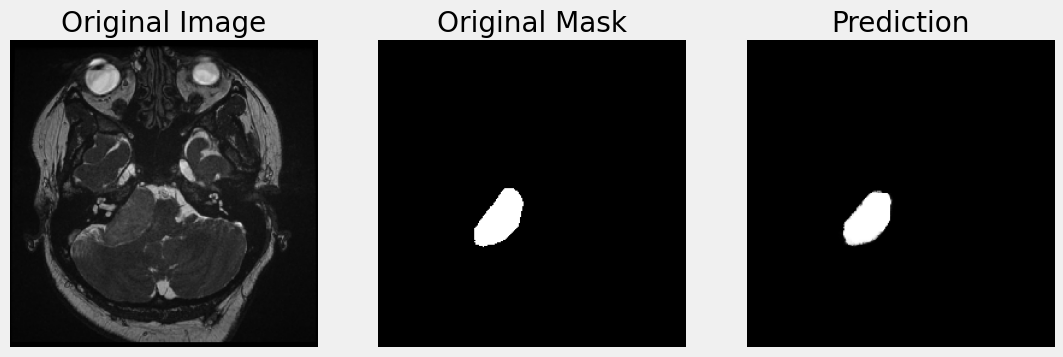

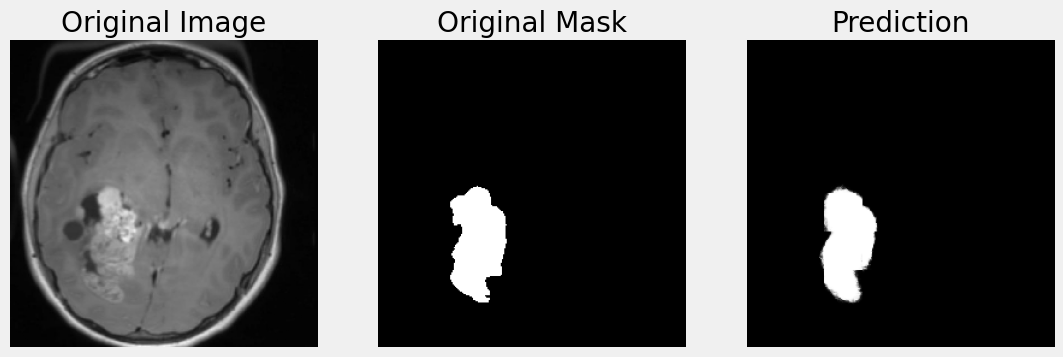

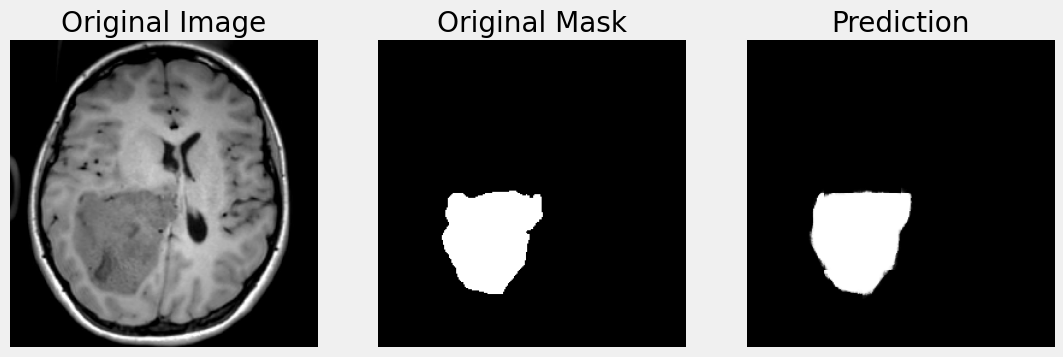

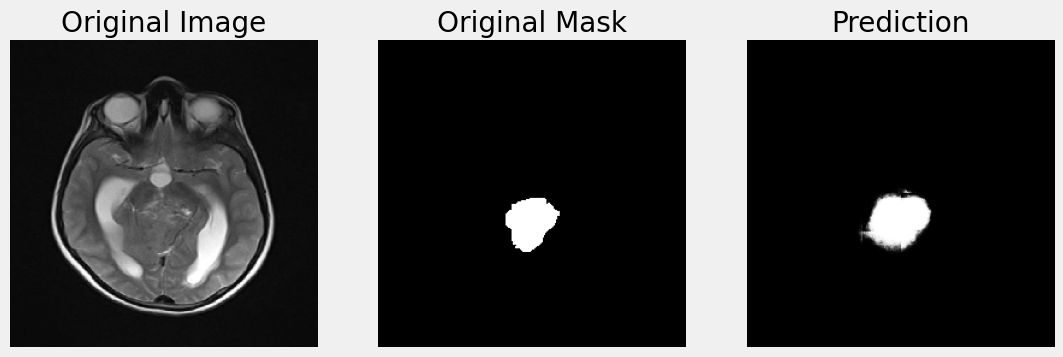

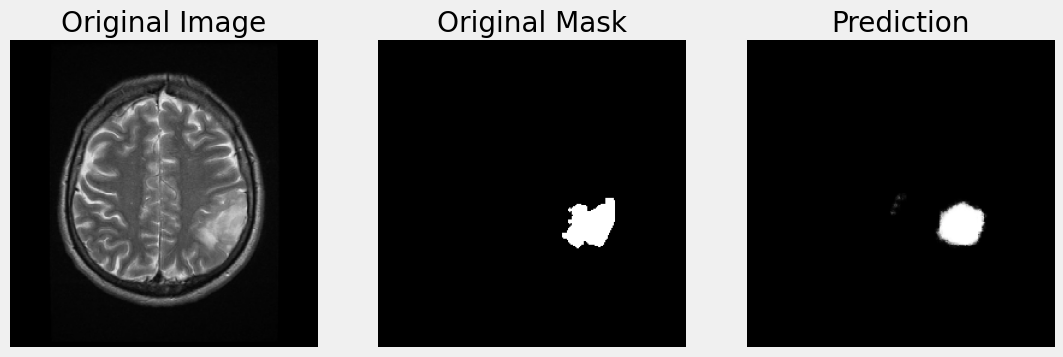

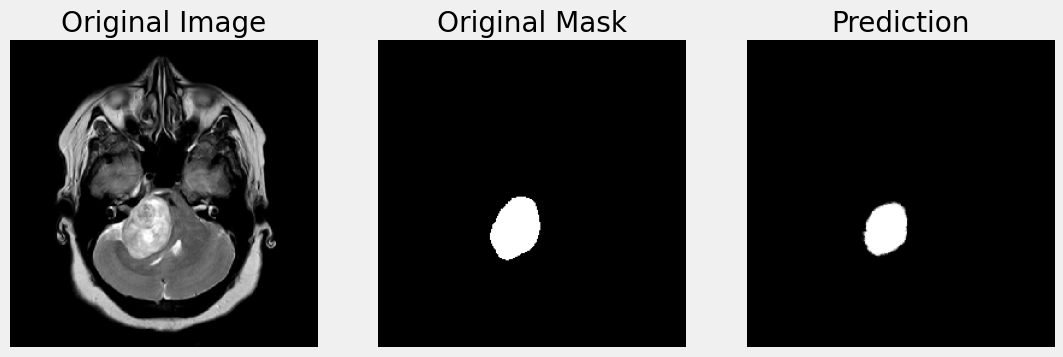

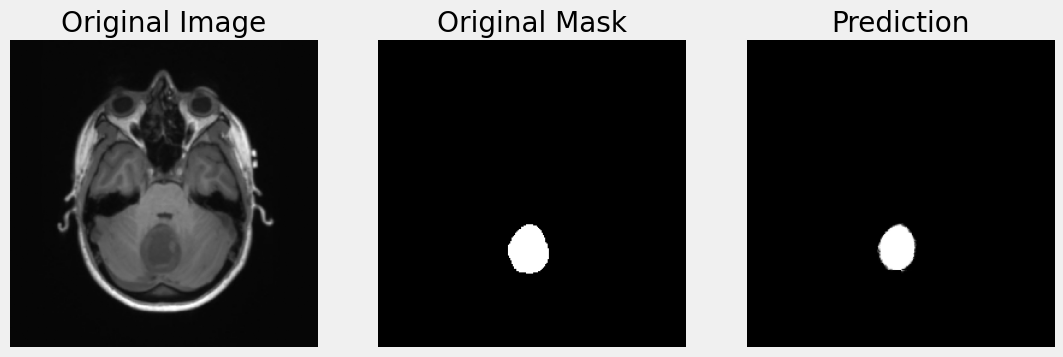

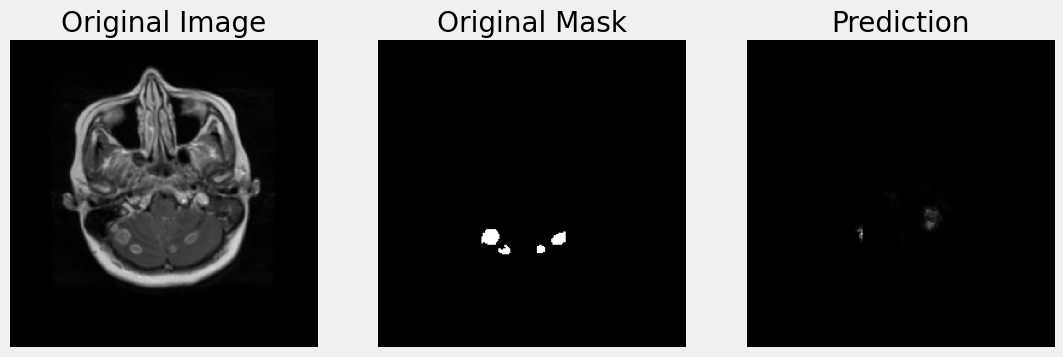

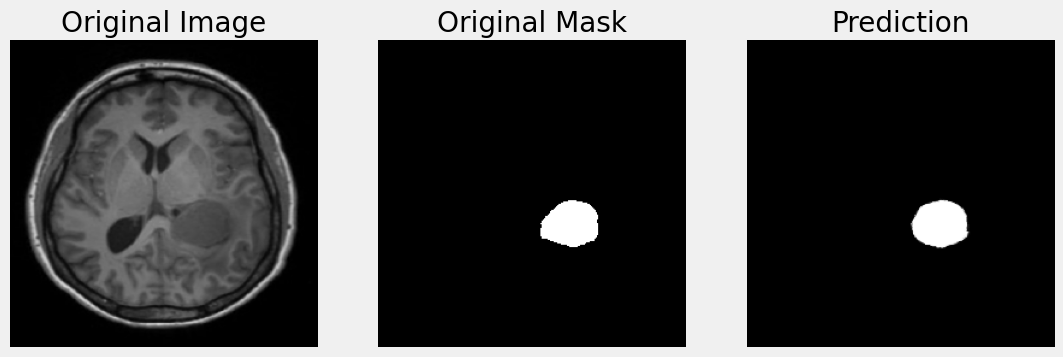

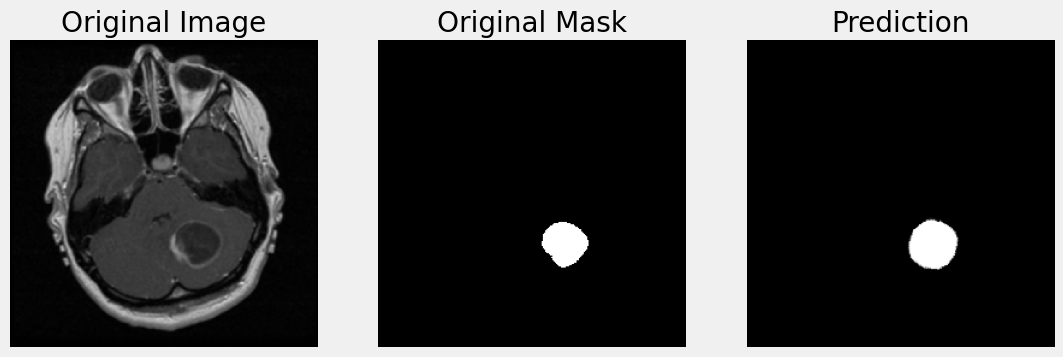

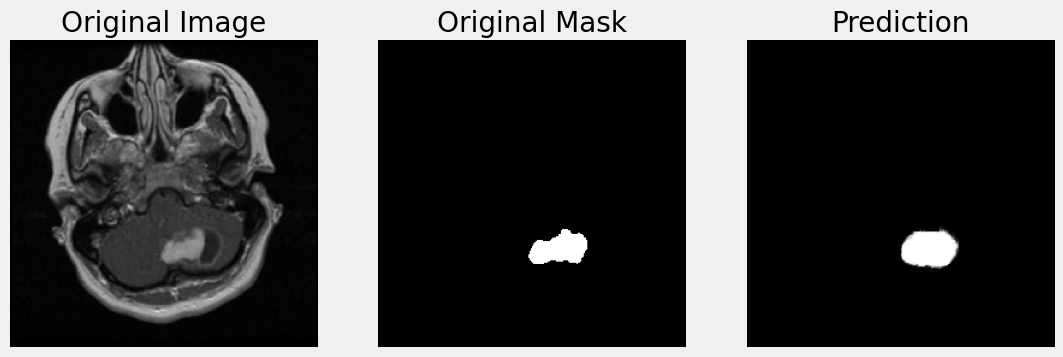

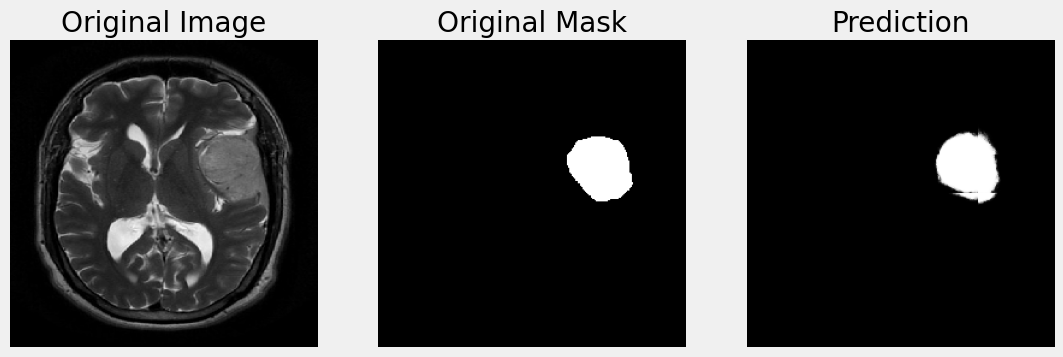

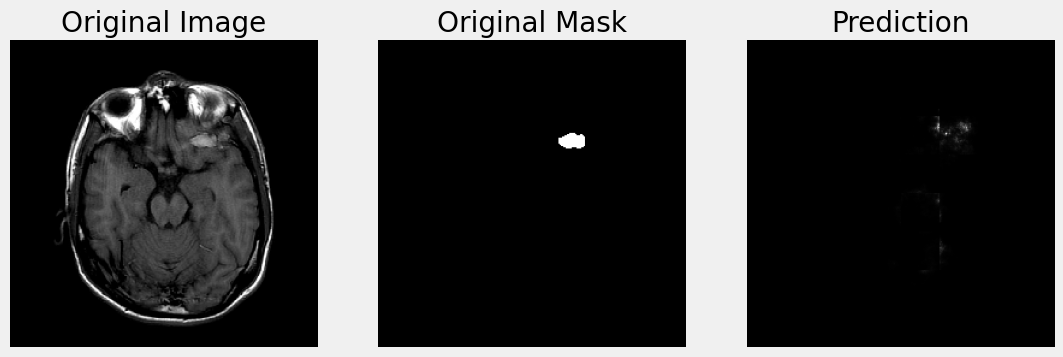

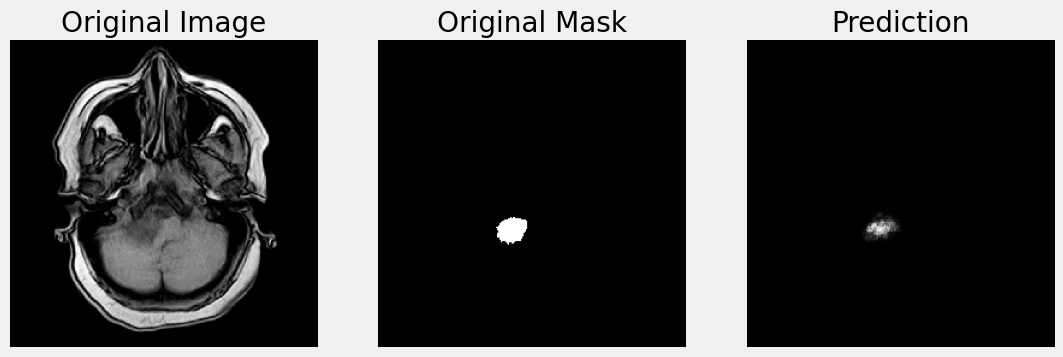

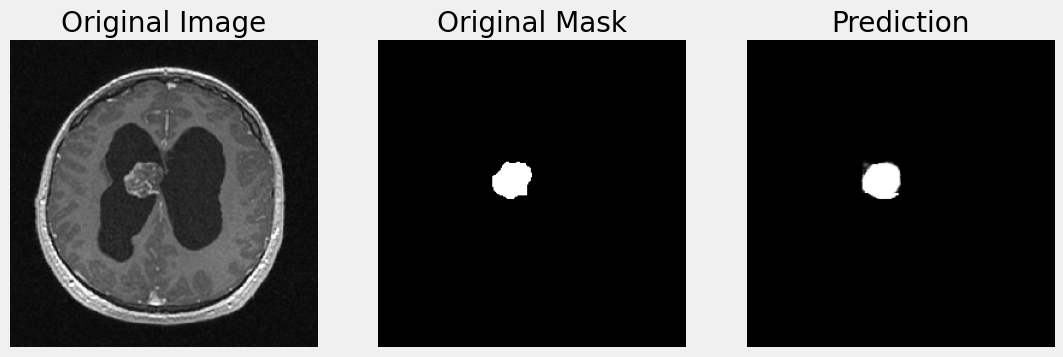

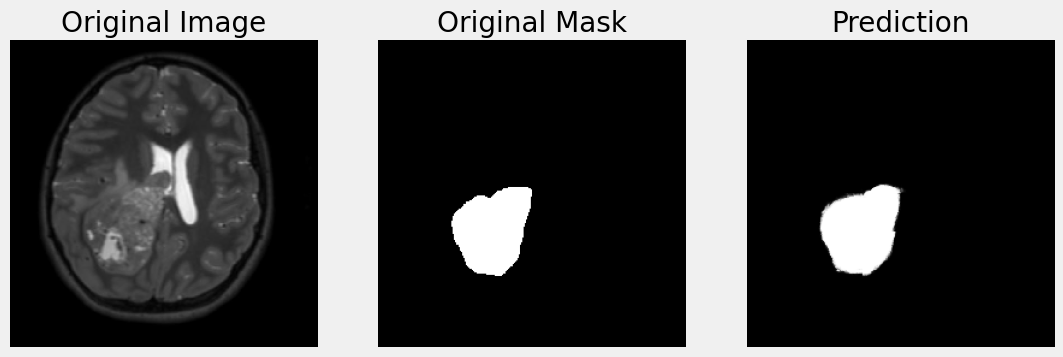

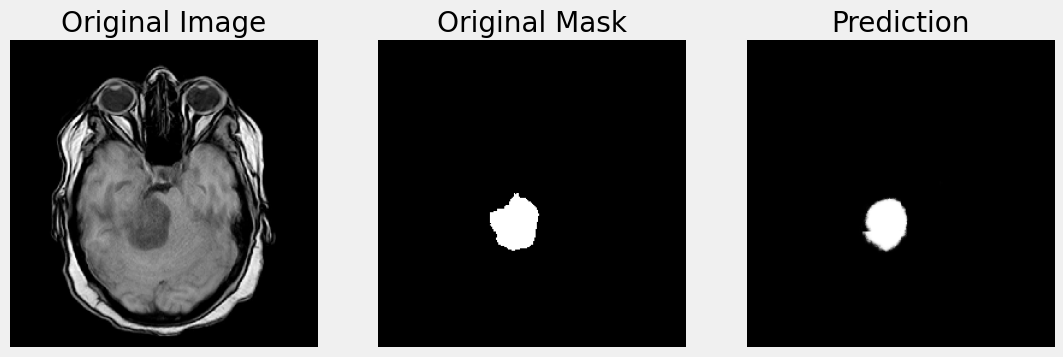

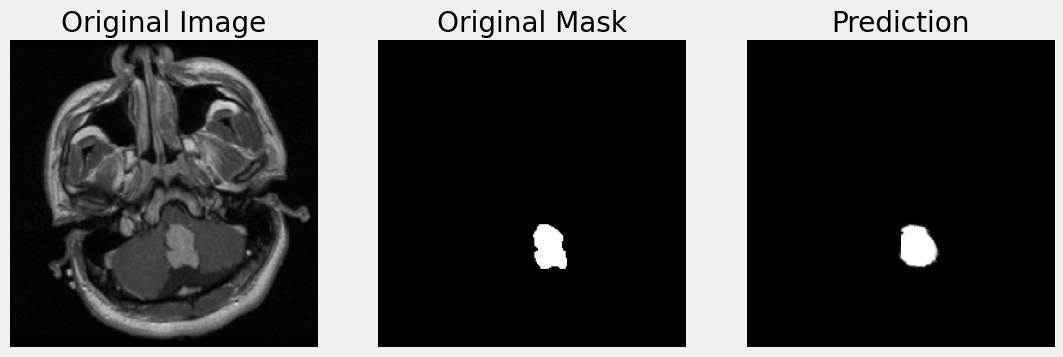

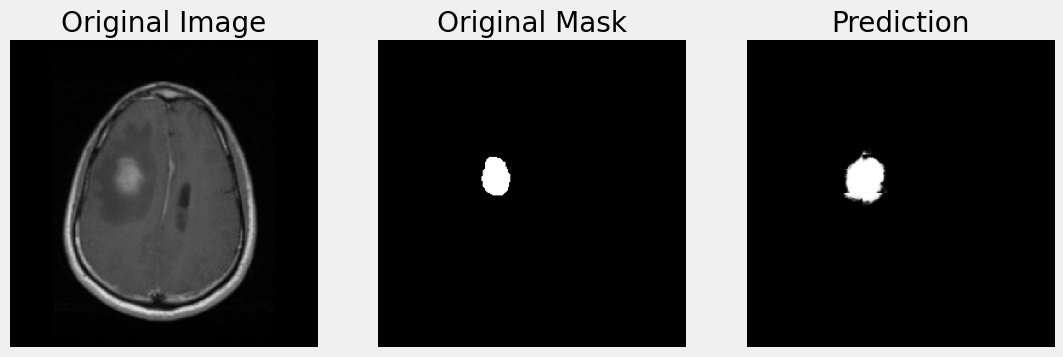

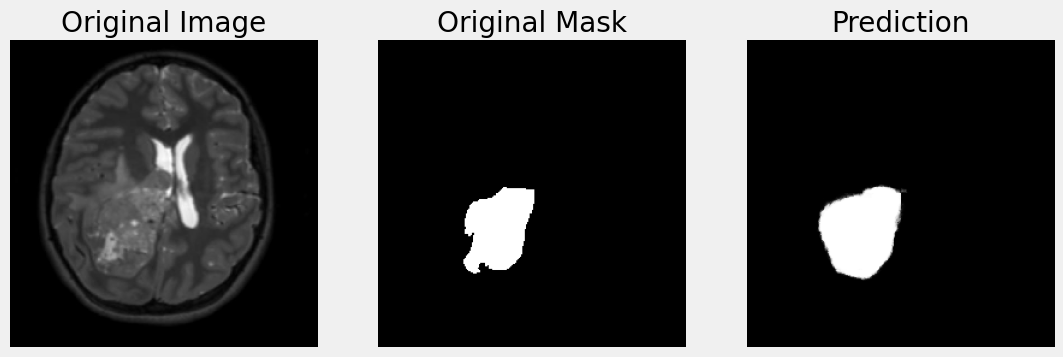

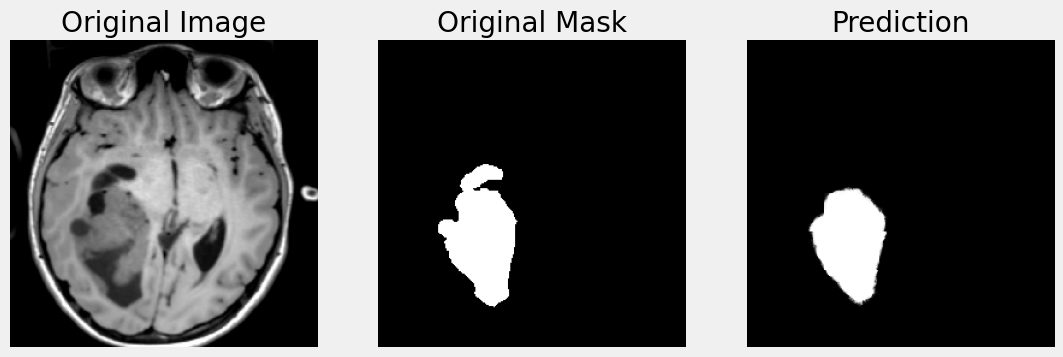

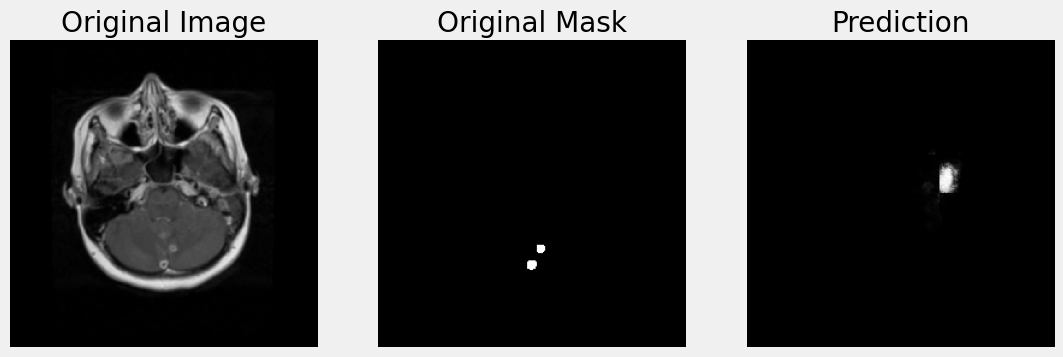

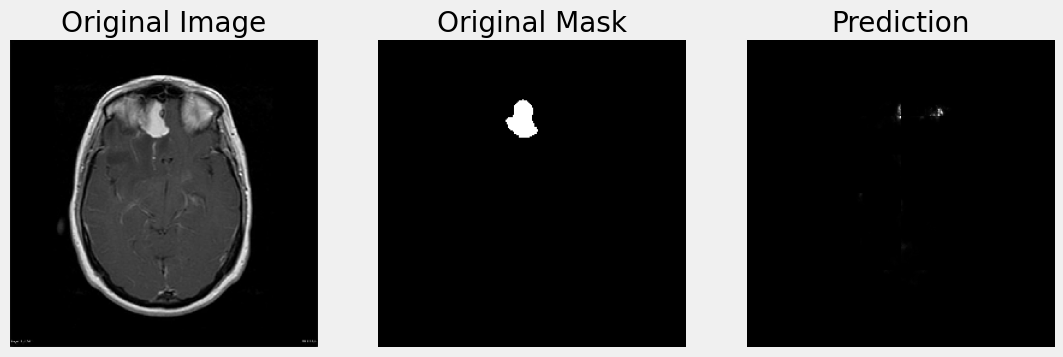

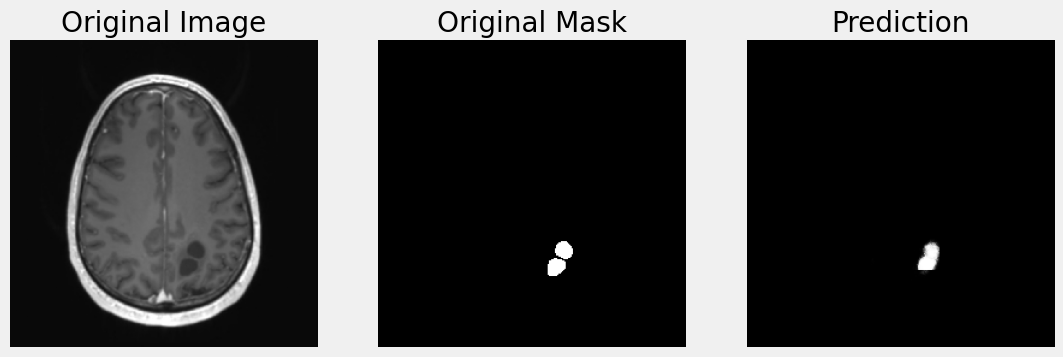

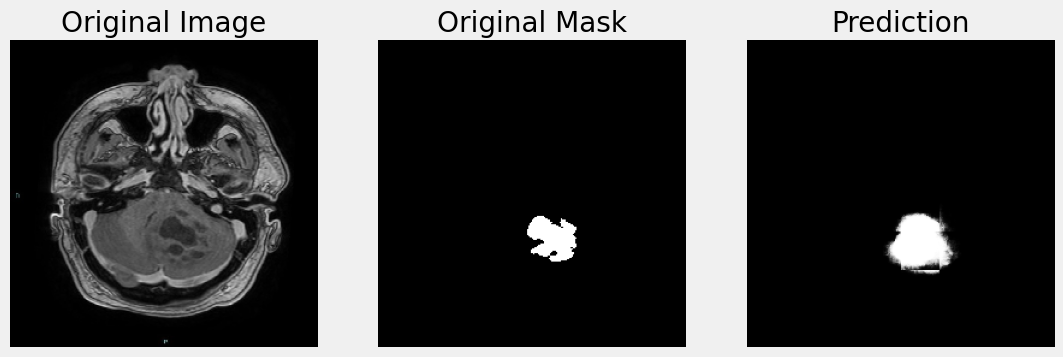

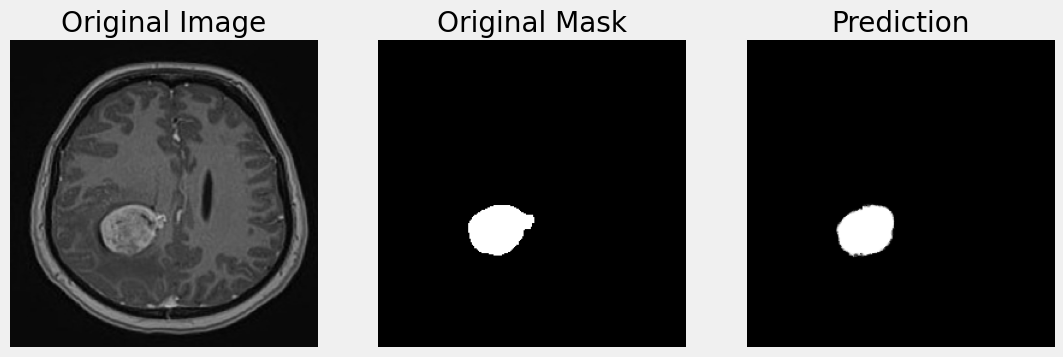

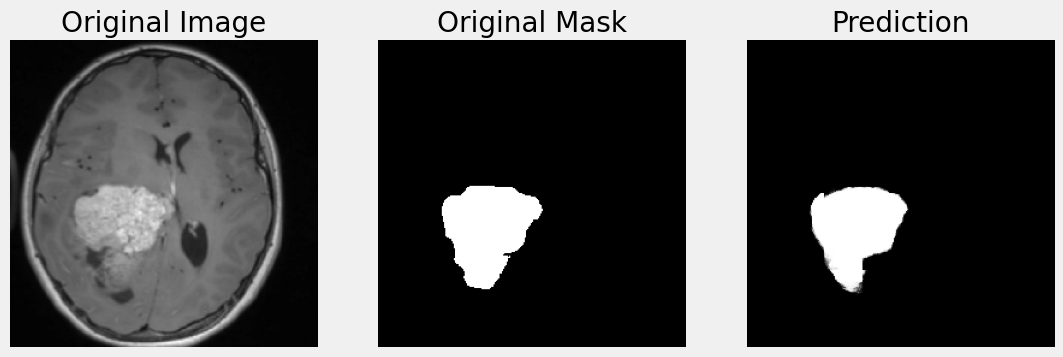

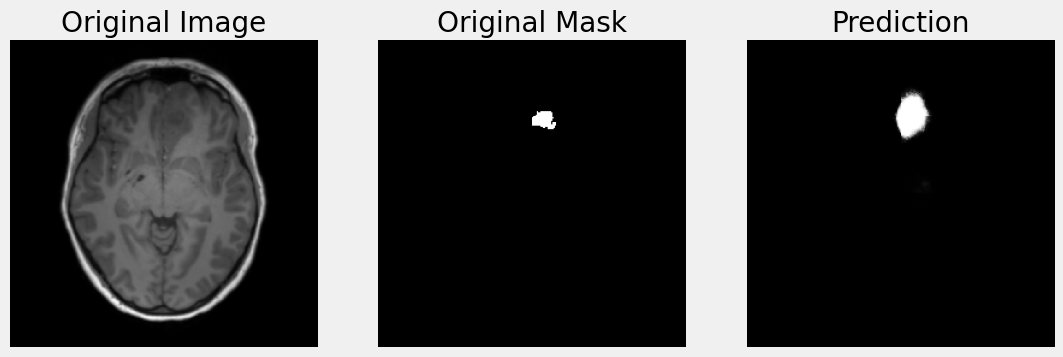

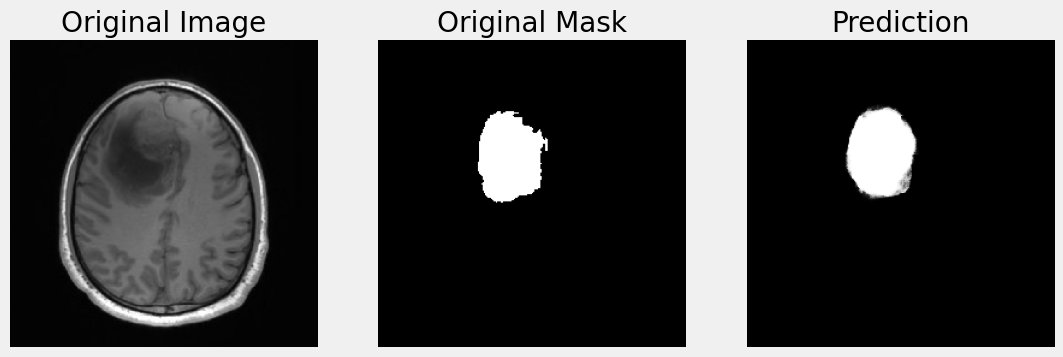

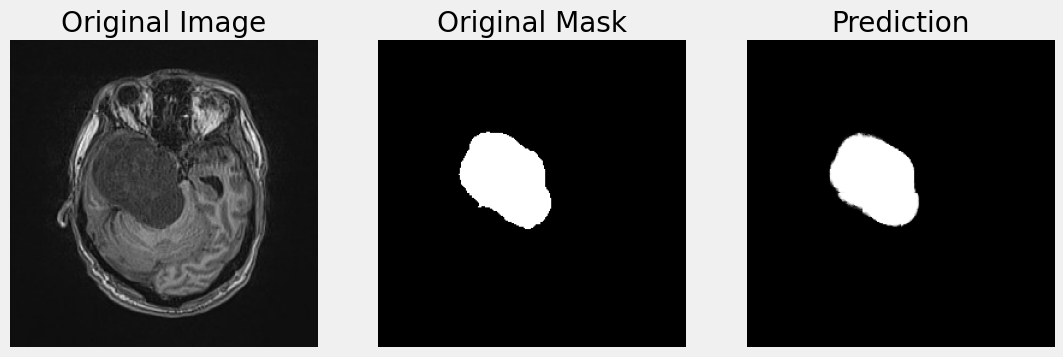

In [ ]:
print("Validation Images")
batch = next(val_gen)
preds = model.predict_on_batch(batch[0])
for _ in range(batch_size):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(batch[0][_])
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(batch[1][_], cmap="gray")
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(preds[_], cmap="gray")
    plt.axis('off')
    plt.title('Prediction')

    plt.show()

Test Images


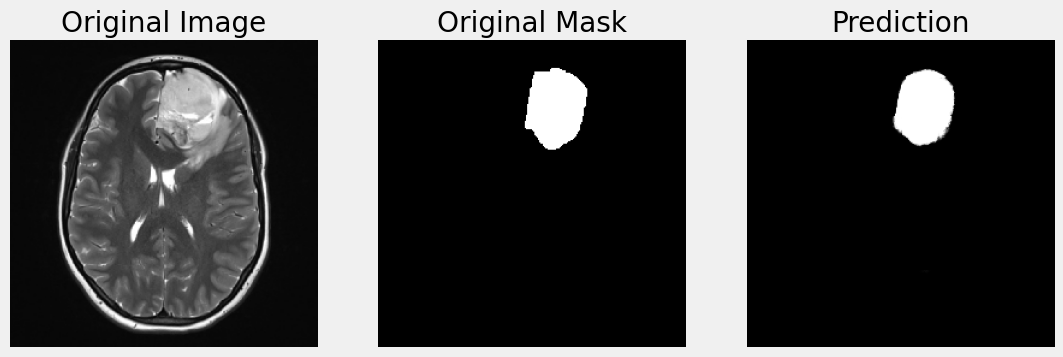

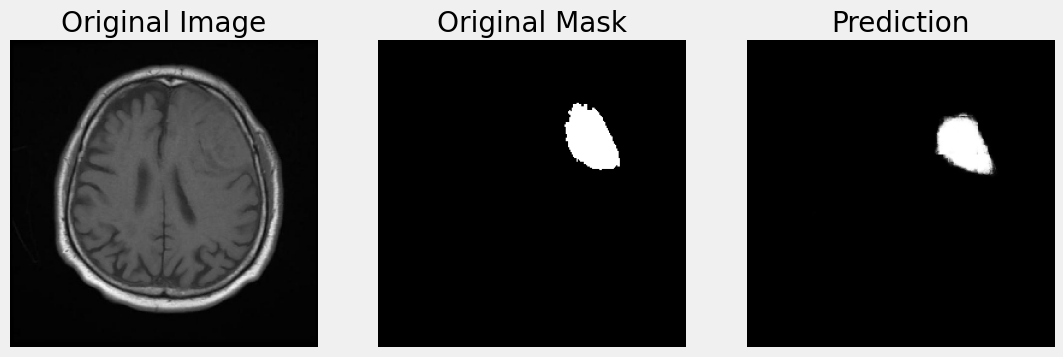

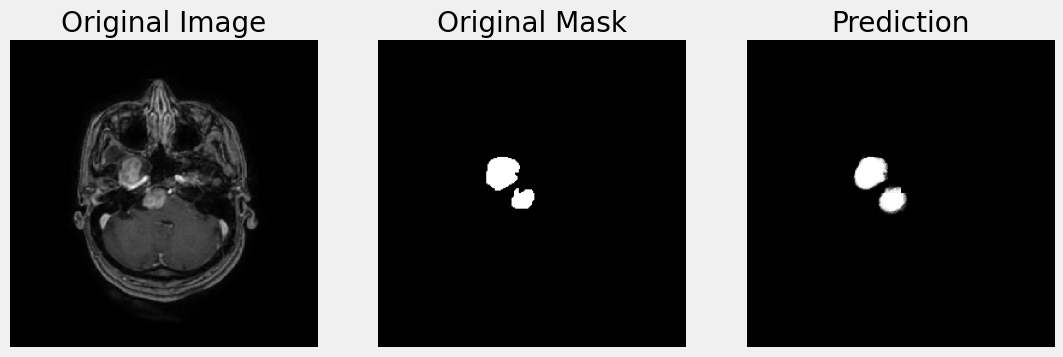

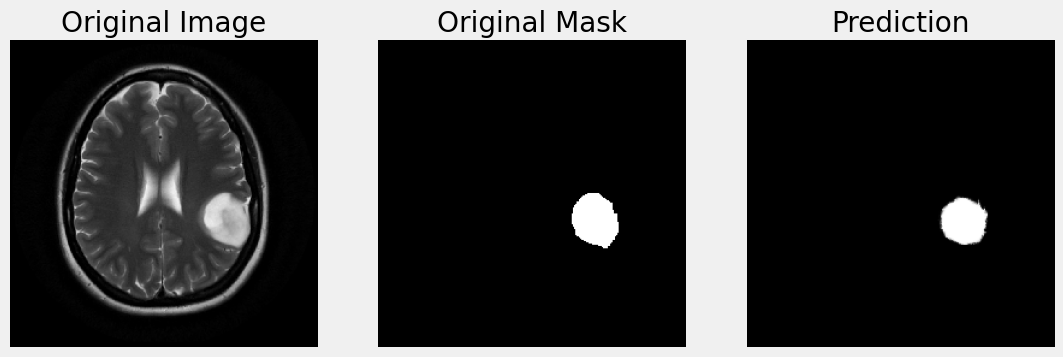

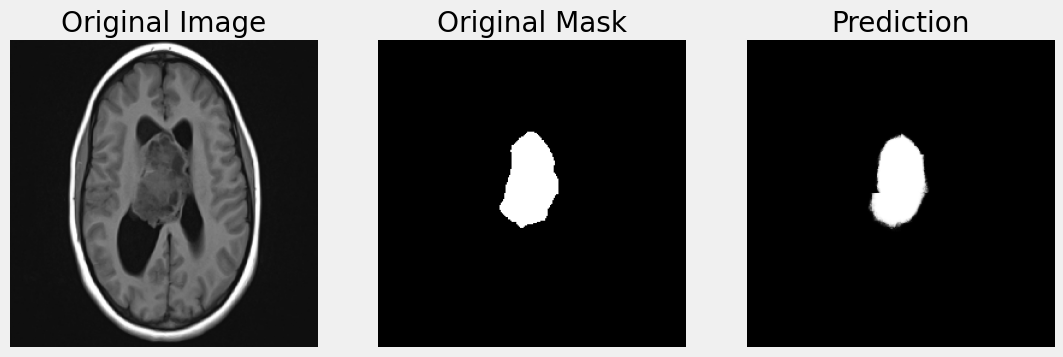

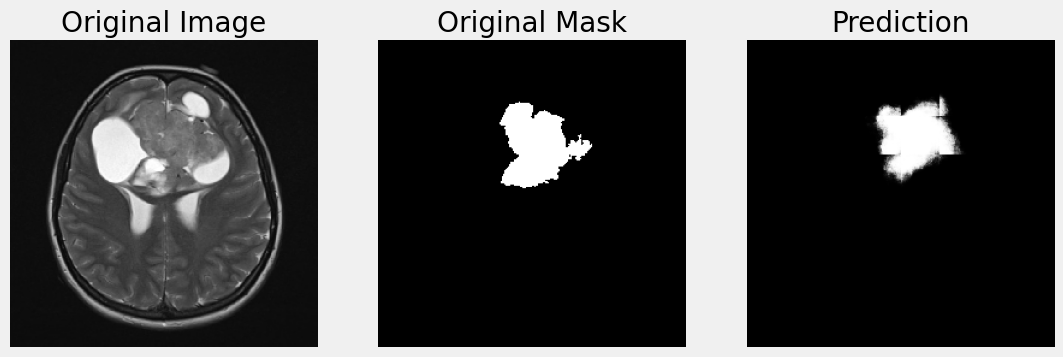

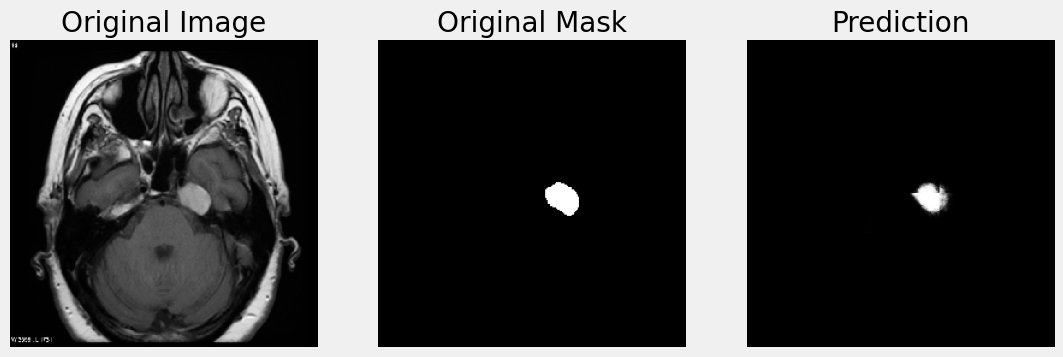

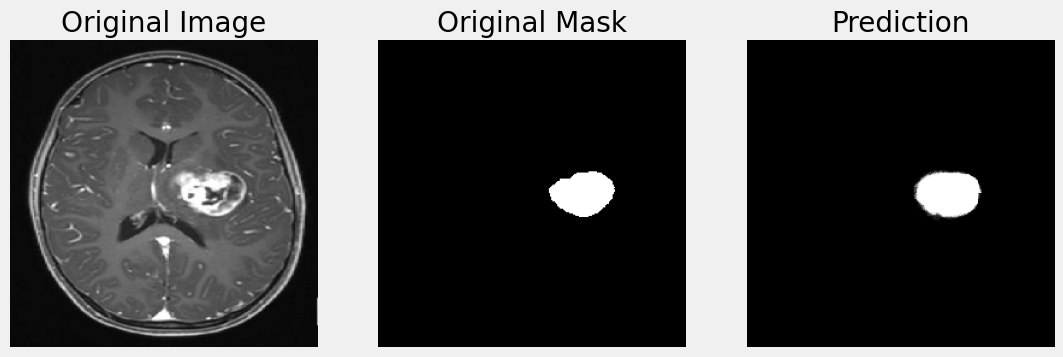

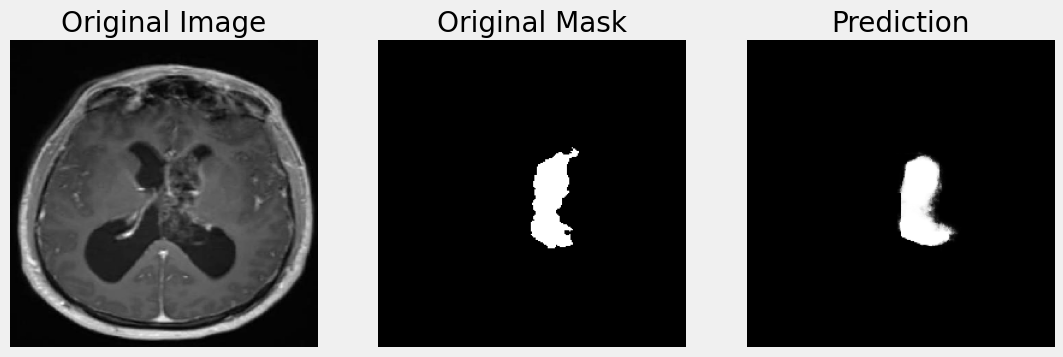

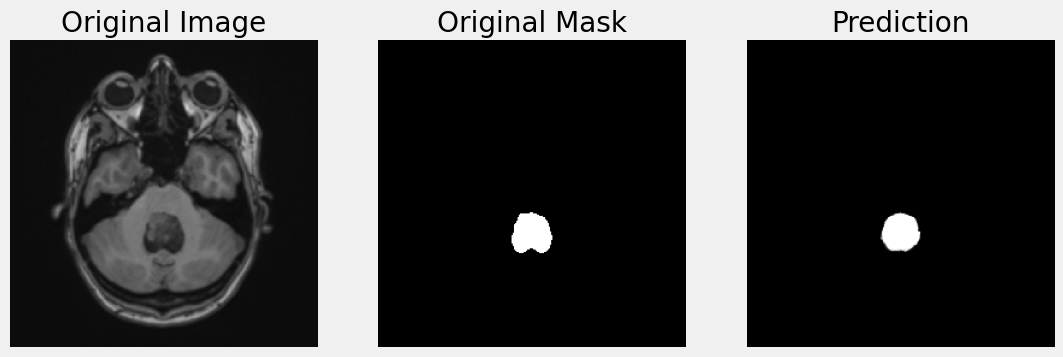

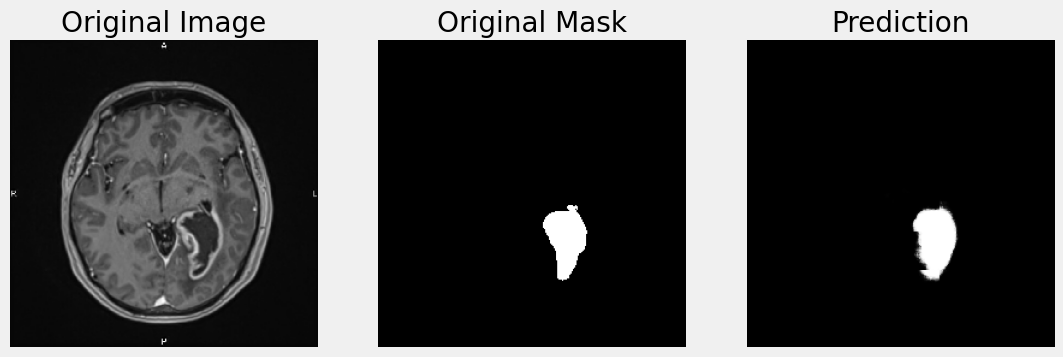

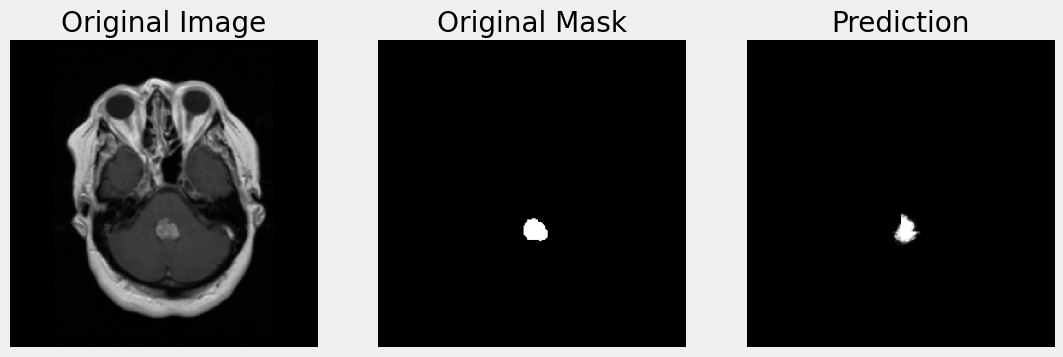

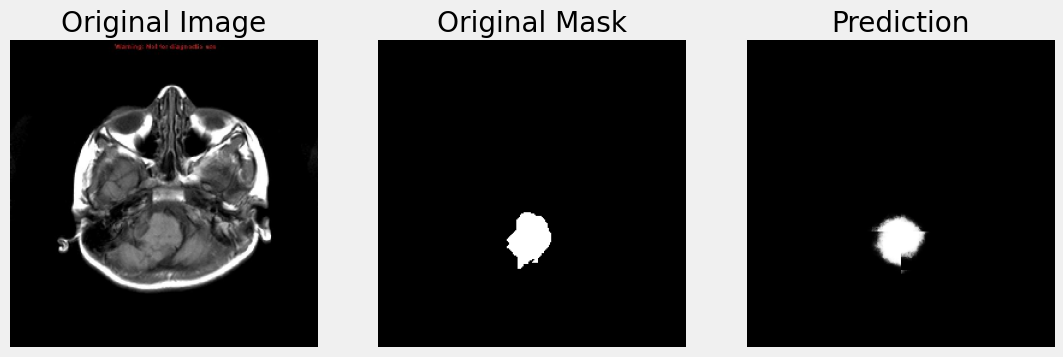

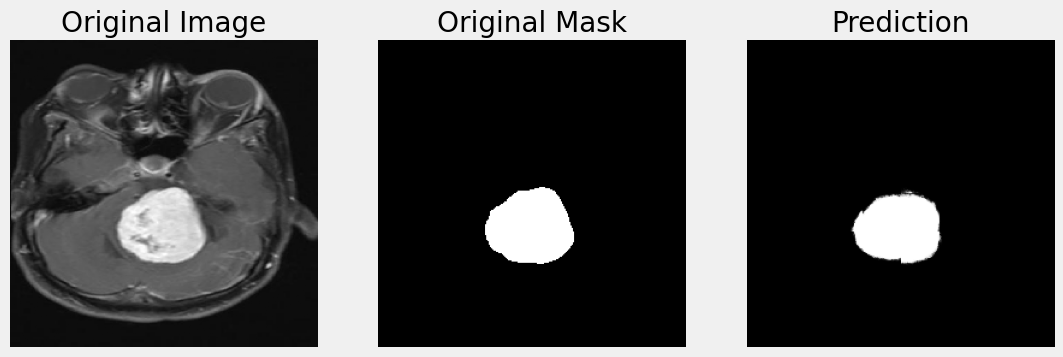

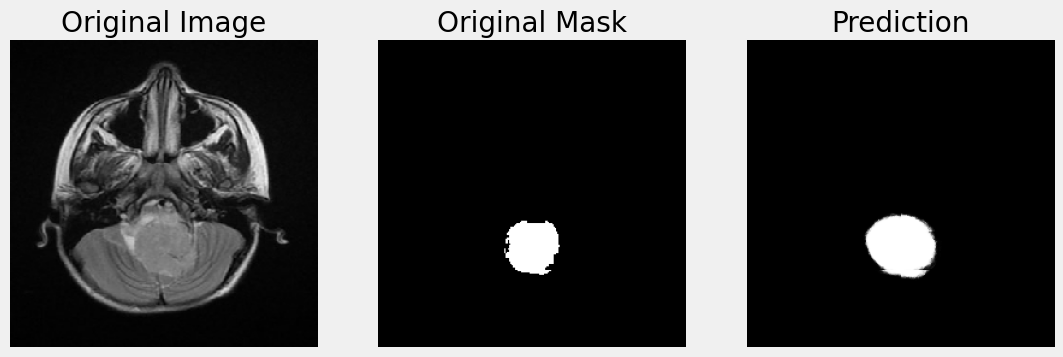

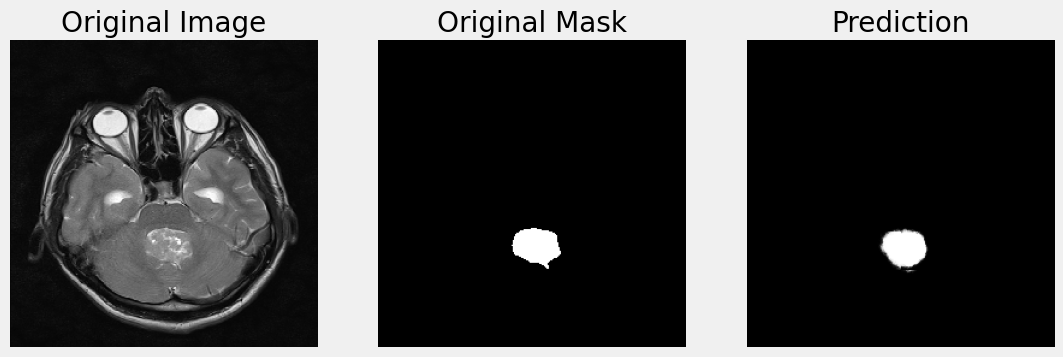

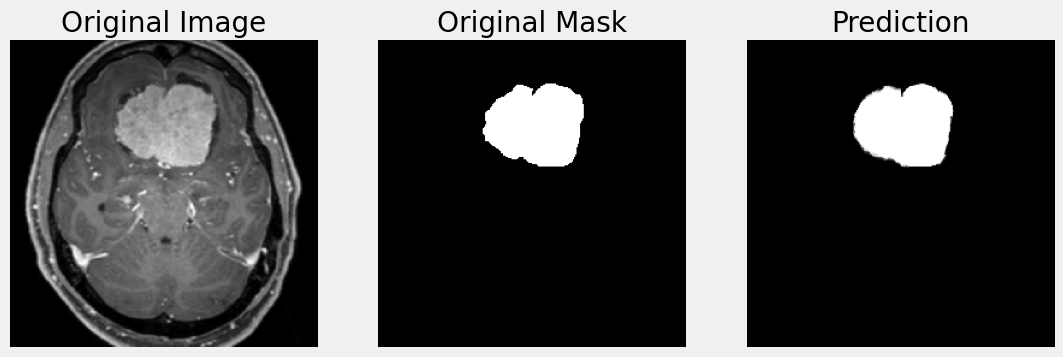

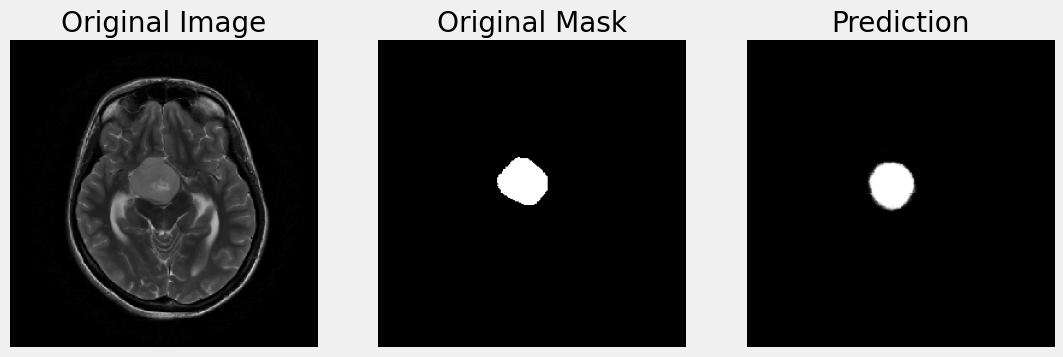

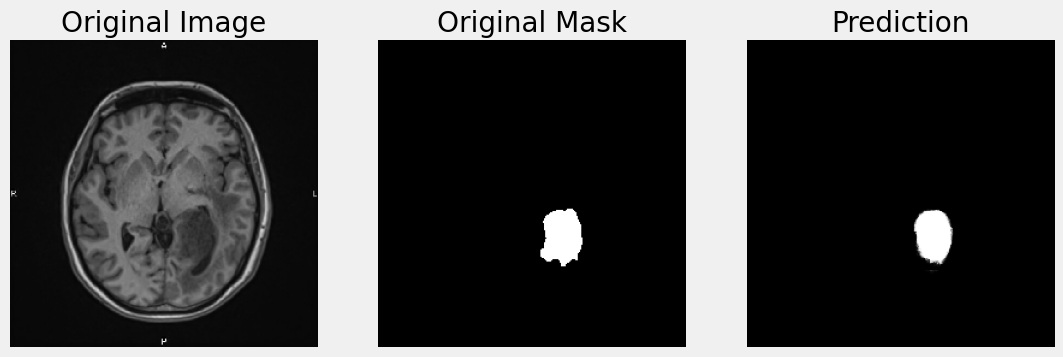

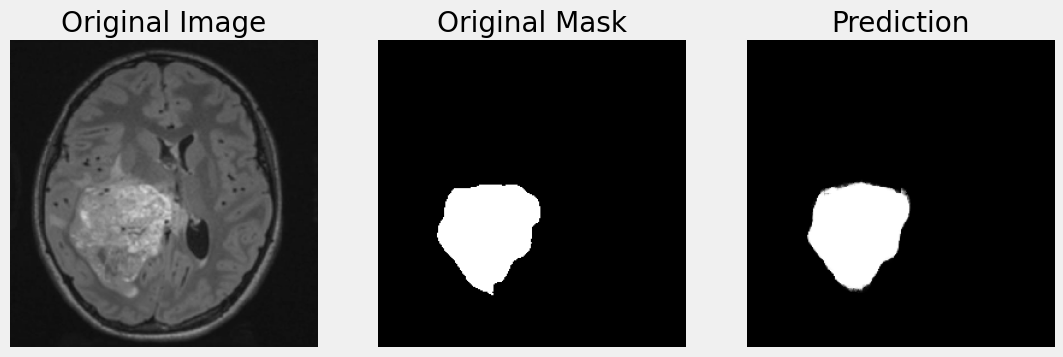

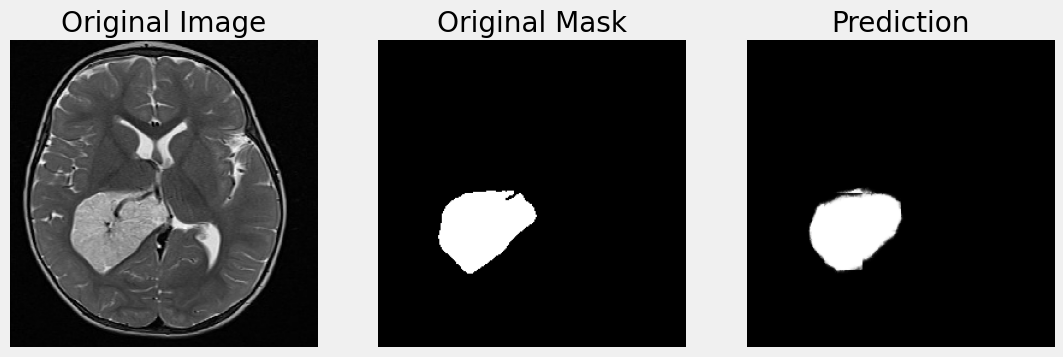

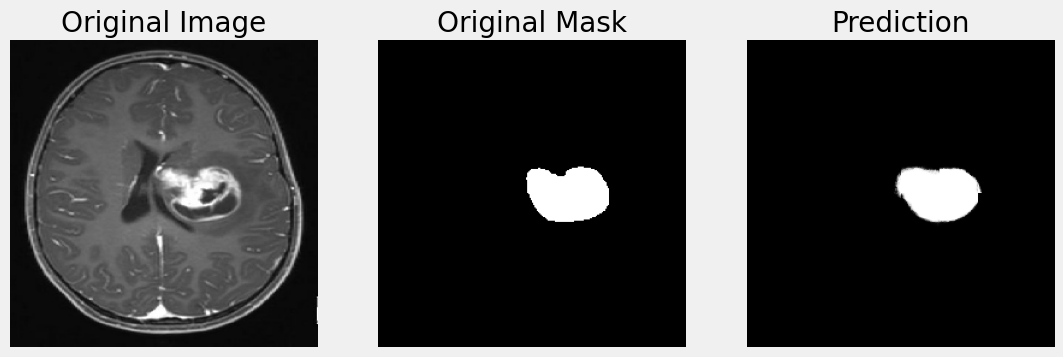

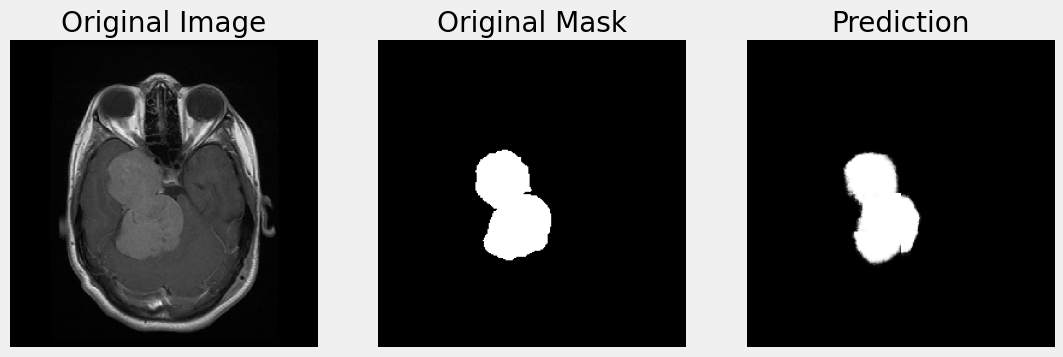

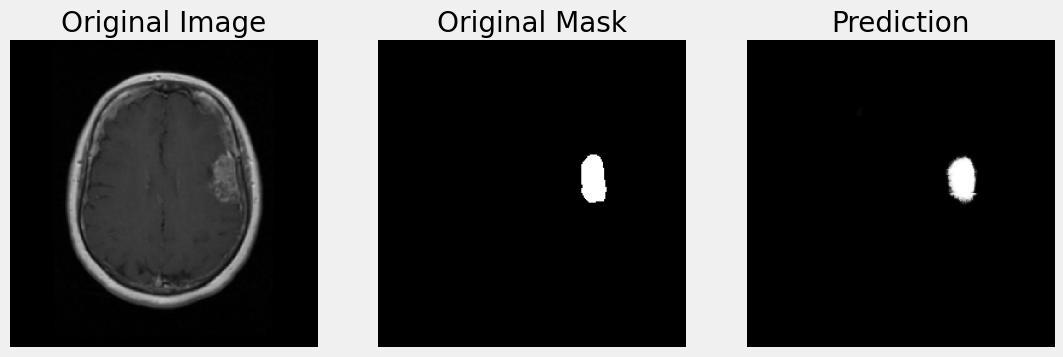

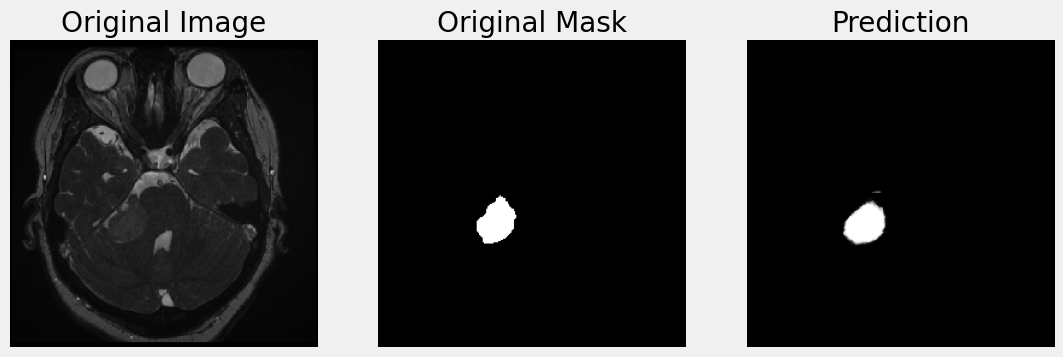

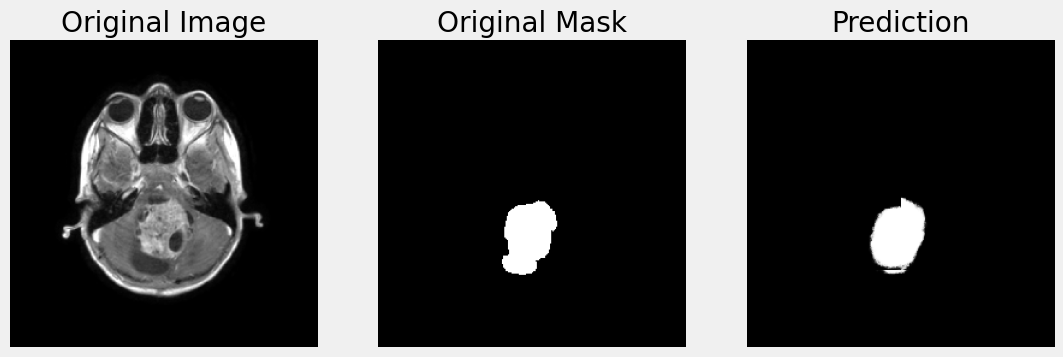

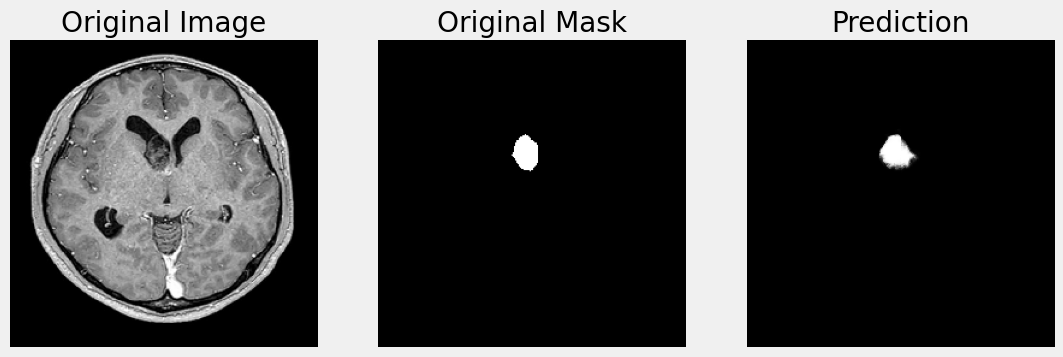

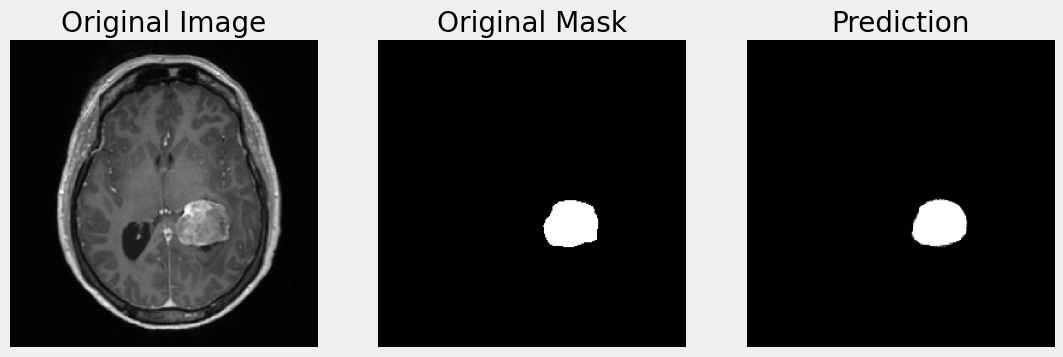

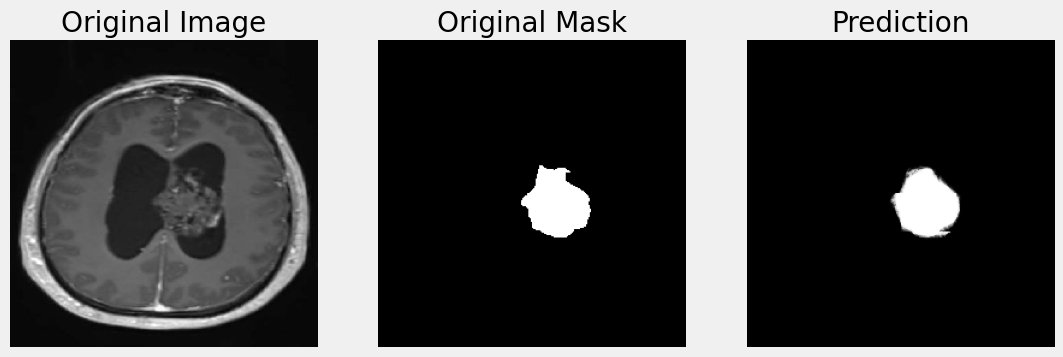

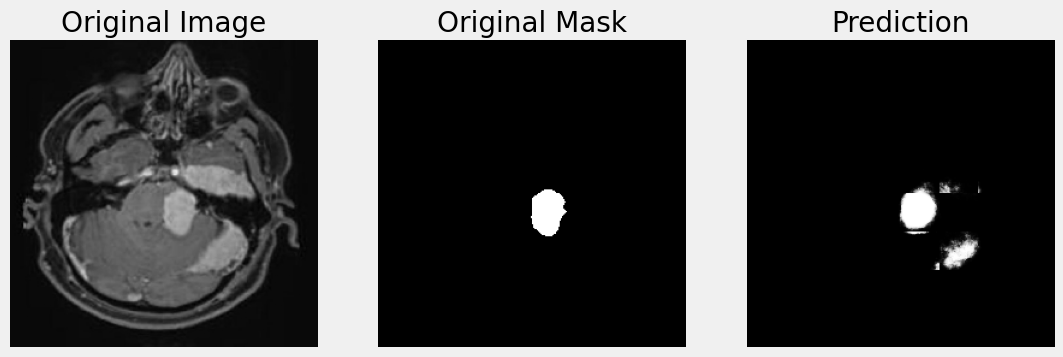

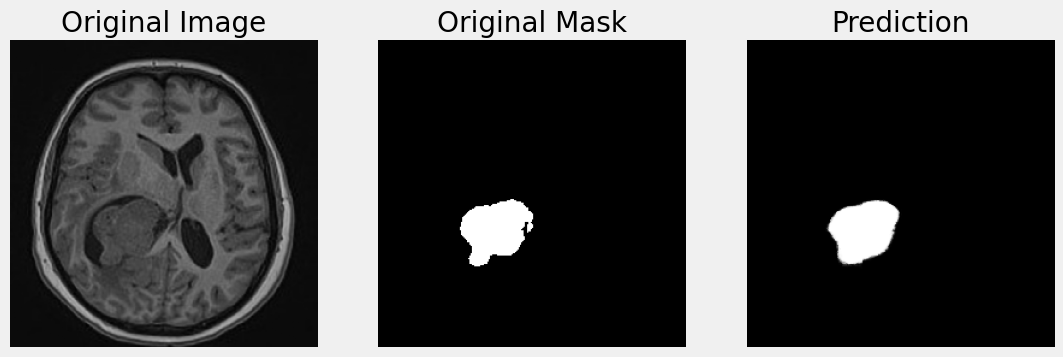

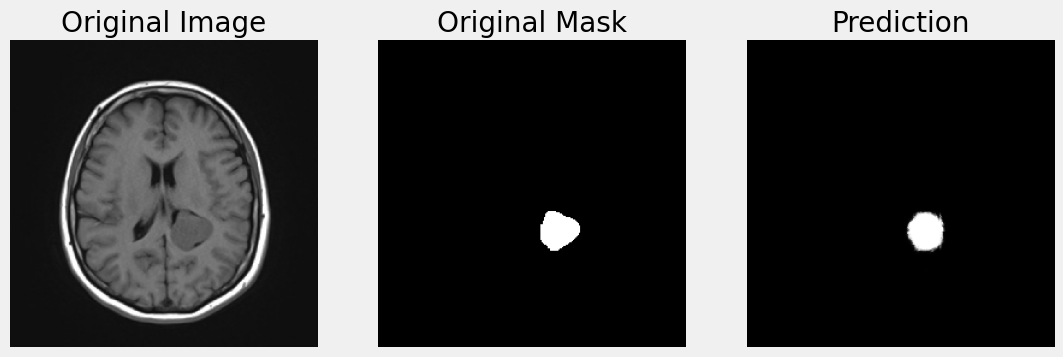

In [ ]:
print("Test Images")
batch = next(test_gen)
preds = model.predict_on_batch(batch[0])
for _ in range(batch_size):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(batch[0][_])
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(batch[1][_], cmap="gray")
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(preds[_], cmap="gray")
    plt.axis('off')
    plt.title('Prediction')

    plt.show()

In [ ]:
shutil.copy(save_path, drive_path)

'/content/drive/MyDrive/TumorSegmentasyon/Clean-FCN32-VGG16-Adamax-32-bce-dice.h5'